# 特征工程

In [1]:
import numpy as np
import pandas as pd

In [2]:
dpath = './data/'
train = pd.read_csv(dpath + "pima-indians-diabetes.csv")
train.head()

,pregnants,Plasma_glucose_concentration,blood_pressure,Triceps_skin_fold_thickness,serum_insulin,BMI,Diabetes_pedigree_function,Age,Target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
pregnants                       768 non-null int64
Plasma_glucose_concentration    768 non-null int64
blood_pressure                  768 non-null int64
Triceps_skin_fold_thickness     768 non-null int64
serum_insulin                   768 non-null int64
BMI                             768 non-null float64
Diabetes_pedigree_function      768 non-null float64
Age                             768 non-null int64
Target                          768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


粗看数据集没有缺失值，但该数据集已知存在缺失值，某些列中存在的缺失值被标记为0。通过这些列中指标的定义和相应领域的常识可以证实上述观点，譬如体重指数和血压两列中的0作为指标数值来说是无意义的。

In [4]:
train.describe()

,pregnants,Plasma_glucose_concentration,blood_pressure,Triceps_skin_fold_thickness,serum_insulin,BMI,Diabetes_pedigree_function,Age,Target
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
NaN_col_names = ['Plasma_glucose_concentration','blood_pressure','Triceps_skin_fold_thickness','serum_insulin','BMI']
np.sum(train[NaN_col_names] == 0)

Plasma_glucose_concentration      5
blood_pressure                   35
Triceps_skin_fold_thickness     227
serum_insulin                   374
BMI                              11
dtype: int64

**在Pandas的DataFrame中，通过replace()函数可以很方便的将我们感兴趣的数据子集的值标记为NaN。标记完缺失值之后，可以利用isnull()函数将数据集中所有的NaN值标记为True，然后就可以得到每一列中缺失值的数量了。**

In [6]:
train[NaN_col_names] = train[NaN_col_names].replace(0, np.NaN)
train.head()

,pregnants,Plasma_glucose_concentration,blood_pressure,Triceps_skin_fold_thickness,serum_insulin,BMI,Diabetes_pedigree_function,Age,Target
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [7]:
train.isnull()

,pregnants,Plasma_glucose_concentration,blood_pressure,Triceps_skin_fold_thickness,serum_insulin,BMI,Diabetes_pedigree_function,Age,Target
0,False,False,False,False,True,False,False,False,False
1,False,False,False,False,True,False,False,False,False
2,False,False,False,True,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,True,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,True,True,False,False,False,False


In [8]:
train.isnull().sum()

pregnants                         0
Plasma_glucose_concentration      5
blood_pressure                   35
Triceps_skin_fold_thickness     227
serum_insulin                   374
BMI                              11
Diabetes_pedigree_function        0
Age                               0
Target                            0
dtype: int64

**对缺失值较多的特征，新增一个特征，表示这个特征是否缺失**

In [9]:
# 缺失值比较多，干脆就开一个新的字段，表明是缺失值还是不是缺失值
train['Triceps_skin_fold_thickness_Missing'] = train['Triceps_skin_fold_thickness'].apply(
    lambda x: 1 if pd.isnull(x) else 0
)
train[['Triceps_skin_fold_thickness', 'Triceps_skin_fold_thickness_Missing']].head()

,Triceps_skin_fold_thickness,Triceps_skin_fold_thickness_Missing
0,35.0,0
1,29.0,0
2,NaN,1
3,23.0,0
4,35.0,0


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
# color = sns.color_palette()
%matplotlib inline

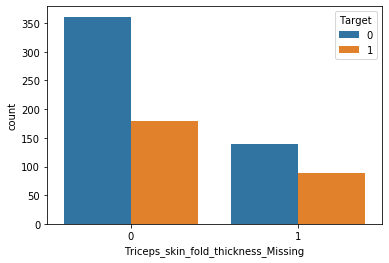

In [11]:
sns.countplot(x="Triceps_skin_fold_thickness_Missing", hue="Target", data=train)
plt.show()

In [12]:
# 缺失值比较多，干脆就开一个新的字段，表明是缺失值还是不是缺失值
train['serum_insulin_Missing'] = train['serum_insulin'].apply(lambda x: 1 if pd.isnull(x) else 0)

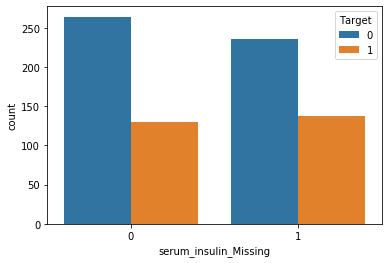

In [13]:
sns.countplot(x="serum_insulin_Missing", hue="Target", data=train)
plt.show()

**不过特征是否缺失好像和目标也没什么关系，感觉特征缺失是随机的，将这新增的特征删除，老实用中值填补算了。**

In [14]:
train.drop(["Triceps_skin_fold_thickness_Missing", "serum_insulin_Missing"], axis=1, inplace=True)
train.head()

,pregnants,Plasma_glucose_concentration,blood_pressure,Triceps_skin_fold_thickness,serum_insulin,BMI,Diabetes_pedigree_function,Age,Target
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


## 中值填充

In [15]:
medians = train.median() 
medians

pregnants                         3.0000
Plasma_glucose_concentration    117.0000
blood_pressure                   72.0000
Triceps_skin_fold_thickness      29.0000
serum_insulin                   125.0000
BMI                              32.3000
Diabetes_pedigree_function        0.3725
Age                              29.0000
Target                            0.0000
dtype: float64

In [16]:
train = train.fillna(medians)
train.head()

,pregnants,Plasma_glucose_concentration,blood_pressure,Triceps_skin_fold_thickness,serum_insulin,BMI,Diabetes_pedigree_function,Age,Target
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [17]:
train.isnull().sum()

pregnants                       0
Plasma_glucose_concentration    0
blood_pressure                  0
Triceps_skin_fold_thickness     0
serum_insulin                   0
BMI                             0
Diabetes_pedigree_function      0
Age                             0
Target                          0
dtype: int64

## 数据标准化

In [18]:
y_train = train['Target']
X_train = train.drop(['Target'], axis=1)

feat_names = X_train.columns

from sklearn.preprocessing import StandardScaler

std_X = StandardScaler()
X_train = std_X.fit_transform(X_train)

## 特征处理结果存为文件

In [19]:
# 存为csv格式
X_train = pd.DataFrame(columns=feat_names, data=X_train)

train = pd.concat([X_train, y_train], axis=1)

train.to_csv(dpath + 'FE_pima-indians-diabetes.csv', index = False, header=True)

In [20]:
train.head()

,pregnants,Plasma_glucose_concentration,blood_pressure,Triceps_skin_fold_thickness,serum_insulin,BMI,Diabetes_pedigree_function,Age,Target
0,0.639947,0.866045,-0.031990,0.670643,-0.181541,0.166619,0.468492,1.425995,1
1,-0.844885,-1.205066,-0.528319,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672,0
2,1.233880,2.016662,-0.693761,-0.012301,-0.181541,-1.332500,0.604397,-0.105584,1
3,-0.844885,-1.073567,-0.528319,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549,0
4,-1.141852,0.504422,-2.679076,0.670643,0.316566,1.549303,5.484909,-0.020496,1
